<a href="https://colab.research.google.com/github/Danjstr/Hello-World/blob/master/Copy_of_D_Strauss_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()



Saving jeee16t08.csv to jeee16t08 (1).csv


In [2]:
#import pandas as pd
import pandas as pd
#read the csv into a data frame
df = pd.read_csv('jeee16t08.csv')


**Part 1: Introdution**

**A brief summary of the type of data you’ve chosen to work with and the research question you hope to answer with it.**




The data set being used contains 52 rows and 11 columns. We will be utilizing 50 of the 52 rows and 6 columns. More specifically we will be removing all columns referring to employment data. The rows we are removing are the "District of Columbia" as it is not technically a state and "Total" as we don't need it for our analysis.


The remaining data includes the 50 States, the Population of those States, and the percent capita that state governments spent in millions of dollars on the Justice System, Police Protection, Judicial and Legal, and Corrections(Jail/Prison).

**Research question:** 
Our research questions will be broken into sections.
We will be answering for each of the five columns bellow -  


Q1:Did any of the states pay so much or so little that they may be considered outliers in comparison to other states?

Steps Taken: Generate the interquartile range of the Per Capita columns and create a box plot showing the outliers.

Q2: Can we determine which states paid the most to least in descending order?

Steps Taken: Create five new data frames of each of the Per capita columns by state. Then make a bar plot of these new data frames in descending order.

1) Total justice system PC 

2) Police Protection PC 

3) Judicial and legal PC  

4) Corrections PC

5) Total_PC


**Part 2: Data Summary**

**Explain where you acquired your data from; how many use cases your data set provides; how many attributes are in each use case; what the data types are for each of the attributes; etc. Be sure include any Python code used as part of your Data Summary work.**

This data was acquired from  Kaggel.com. After working with the data set I realized that kaggel had taken the data from Data World. Both are mentioned in the References section. The data has a variety of use cases which include analyzing the Per capita data, analyzing the employment data, and comparing data with the population column. All columns except the State column are float64. While State is an object.

Show the head of our dataframe so that we know what we are working with.

In [3]:
#print first 10 rows of the dataframe
df.head(10)


,State,Population 2016,Total justice system PC,Police Protection PC,Judicial and legal PC,Corrections PC,Total justice system Employment,police protection Total Employment,police protection Sworn only Employment,Judicial and legal Employment,Corrections Employment
0,Total,323071342,722.70,338.04,143.18,241.48,63.12,28.51,21.73,12.83,21.78
1,Alabama,4864745,480.11,257.21,74.43,148.47,55.43,29.08,23.00,9.73,16.62
2,Alaska,741504,1297.65,499.27,342.55,455.84,77.18,25.68,15.58,20.08,31.42
3,Arizona,6945452,709.77,325.62,141.59,242.56,66.07,28.30,20.43,15.91,21.85
4,Arkansas,2990410,503.99,231.09,73.68,199.21,68.44,29.50,22.11,11.52,27.41
5,California,39209127,1063.89,448.11,221.27,394.51,59.85,25.65,18.27,11.31,22.89
6,Colorado,5540921,711.18,338.09,136.11,236.98,62.81,28.12,19.81,14.09,20.60
7,Connecticut,3578674,767.90,345.66,231.06,191.18,61.58,28.14,22.43,17.23,16.20
8,Delaware,949216,910.60,366.65,219.12,324.84,78.60,27.45,21.58,20.28,30.87
9,District of Columbia,686575,1268.29,864.21,193.01,211.07,112.53,63.36,54.85,29.39,19.78


Show the tail of our dataframe so that we know what we are working with.

In [4]:
#print last 10 rows of the dataframe
df.tail(10)

,State,Population 2016,Total justice system PC,Police Protection PC,Judicial and legal PC,Corrections PC,Total justice system Employment,police protection Total Employment,police protection Sworn only Employment,Judicial and legal Employment,Corrections Employment
42,South Dakota,862890,547.21,233.25,105.77,208.19,53.08,24.34,19.46,11.47,17.27
43,Tennessee,6645011,571.23,279.13,115.18,176.92,61.78,31.61,25.46,11.32,18.85
44,Texas,27937492,592.19,272.58,107.66,211.95,61.91,27.25,19.87,10.00,24.67
45,Utah,3042613,503.63,215.29,115.28,173.06,47.71,20.83,14.38,9.83,17.04
46,Vermont,623644,650.75,301.79,129.11,219.84,52.69,23.94,16.02,11.30,17.45
47,Virginia,8410946,705.52,277.95,123.12,304.45,66.47,26.06,20.93,10.71,29.70
48,Washington,7294680,660.33,267.91,155.59,236.83,49.34,19.76,13.68,11.54,18.04
49,West Virginia,1830929,555.79,211.49,151.51,192.79,58.25,22.48,17.97,15.30,20.47
50,Wisconsin,5772958,708.58,324.53,114.83,269.22,60.33,27.63,21.22,9.40,23.29
51,Wyoming,584290,997.13,413.82,216.09,367.22,85.03,34.78,25.28,16.91,33.34


Show the description of the data so that we have some basic summary statistics.

In [5]:
#View the description of our data. 
df.describe()

,Population 2016,Total justice system PC,Police Protection PC,Judicial and legal PC,Corrections PC,Total justice system Employment,police protection Total Employment,police protection Sworn only Employment,Judicial and legal Employment,Corrections Employment
count,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1.242582e+07,690.660577,322.158269,141.855192,226.646923,62.916154,28.313462,21.539038,13.510192,21.091154
std,4.450496e+07,187.468456,107.396671,50.892977,68.012654,11.790483,6.775407,6.321692,4.169876,4.866900
min,5.842900e+05,450.080000,160.320000,72.350000,141.860000,42.660000,19.760000,13.680000,7.290000,13.600000
25%,1.793929e+06,557.665000,262.160000,111.995000,177.062500,55.805000,24.902500,17.825000,10.792500,17.645000
50%,4.558222e+06,667.840000,297.555000,134.270000,209.160000,61.005000,27.570000,20.950000,12.785000,20.095000
75%,7.573746e+06,746.622500,352.662500,160.262500,248.925000,66.350000,29.652500,22.725000,15.540000,24.497500
max,3.230713e+08,1297.650000,864.210000,342.550000,455.840000,112.530000,63.360000,54.850000,29.390000,33.340000


Show the info of the data to see if we are missing any information or need to change data types.

In [6]:
#View the info of our data. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   State                                     52 non-null     object 
 1   Population 2016                           52 non-null     int64  
 2   Total justice system PC                   52 non-null     float64
 3   Police Protection PC                      52 non-null     float64
 4   Judicial and legal PC                     52 non-null     float64
 5   Corrections PC                            52 non-null     float64
 6   Total justice system Employment           52 non-null     float64
 7   police protection Total Employment        52 non-null     float64
 8   police protection Sworn only Employment   52 non-null     float64
 9   Judicial and legal Employment             52 non-null     float64
 10  Corrections Employment                  

Show the Columns of the Dataframe so we have a clear overview of the columns we are working with.

In [7]:
#View all the columns of our data. 
df.columns

Index(['State', 'Population 2016', 'Total justice system PC ',
       'Police Protection PC', 'Judicial and legal PC', 'Corrections PC',
       'Total justice system Employment ',
       'police protection Total Employment ',
       'police protection Sworn only Employment ',
       'Judicial and legal Employment ', 'Corrections Employment '],
      dtype='object')

Show the shape of the dataframe so we know how many columns and rows we are working with.

In [8]:
#View the shape of our data. 
df.shape

(52, 11)

Data Preparation: 

The first step in our process is to remove the obvious fat. Many of the columns in this data set and some of the rows are unnecessary for our research questions. As such they are dropped and the remaining columns are saved as a new data frame.

In [9]:
#View all the rows of our data by the state column. 
print(list(df['State']))

['Total', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


Drop the Total row and the District of Columbia row as neither of them are States.

In [10]:
#drop Total and Distrit of columbia rows
df1=df.drop([0,9])

Print the list of the Stae column and its length to make sure the change was successful.

In [11]:
#Verify that we only have the data for our 50 states. 
print(list(df1['State']))
print(len(list(df1['State'])))

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
50


Next drop all columns that we will not be using for our analysis.

In [12]:
#Drop all unnecessary columns
p_capita= df1.drop(['Total justice system Employment ',
       'police protection Total Employment ',
       'police protection Sworn only Employment ',
       'Judicial and legal Employment ', 'Corrections Employment '], axis=1)

Print the head of our new data frame to make sure the drop was successful.

In [13]:
#View the head of our new data frame. 
p_capita.head()

,State,Population 2016,Total justice system PC,Police Protection PC,Judicial and legal PC,Corrections PC
1,Alabama,4864745,480.11,257.21,74.43,148.47
2,Alaska,741504,1297.65,499.27,342.55,455.84
3,Arizona,6945452,709.77,325.62,141.59,242.56
4,Arkansas,2990410,503.99,231.09,73.68,199.21
5,California,39209127,1063.89,448.11,221.27,394.51


Retrieve the .info of our new dataframe to make sure everything is correct.

In [14]:
#View the info of our new data frame. 
p_capita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 51
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State                     50 non-null     object 
 1   Population 2016           50 non-null     int64  
 2   Total justice system PC   50 non-null     float64
 3   Police Protection PC      50 non-null     float64
 4   Judicial and legal PC     50 non-null     float64
 5   Corrections PC            50 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.7+ KB


Create a new column in the p_capita data frame that has the sum of all the per capita columns and show it.

In [15]:
#Add a new column "Total_PC" That has the sum of the Per capita columns. 
p_capita['Total_PC'] = p_capita['Total justice system PC '] + p_capita['Police Protection PC'] + p_capita['Judicial and legal PC'] + p_capita['Corrections PC']

In [16]:
#Print the modified data frame
p_capita

,State,Population 2016,Total justice system PC,Police Protection PC,Judicial and legal PC,Corrections PC,Total_PC
1,Alabama,4864745,480.11,257.21,74.43,148.47,960.22
2,Alaska,741504,1297.65,499.27,342.55,455.84,2595.31
3,Arizona,6945452,709.77,325.62,141.59,242.56,1419.54
4,Arkansas,2990410,503.99,231.09,73.68,199.21,1007.97
5,California,39209127,1063.89,448.11,221.27,394.51,2127.78
6,Colorado,5540921,711.18,338.09,136.11,236.98,1422.36
7,Connecticut,3578674,767.90,345.66,231.06,191.18,1535.80
8,Delaware,949216,910.60,366.65,219.12,324.84,1821.21
10,Florida,20629982,701.08,380.44,114.70,205.94,1402.16
11,Georgia,10304763,568.02,263.81,117.93,186.28,1136.04


**Part 3: Exploratory Data Analysis**

**Provide summary statistics for each attribute; provide appropriate graphical analysis for each attribute using both Matplotlib and Seaborn. For example, if you believe it is appropriate to generate a histogram for a particular variable as part of your EDA, create it first using Matplotlib and then once again using Seaborn. Include a narrative describing your EDA findings. Be sure include any Python code used as part of your EDA work.**

Print the means of the p_capita dataframe and label them. We are not interested in the population mean so we will be ranging from 1 to 5 instead of 0 to 5.

In [17]:
#Print the mean of each of the per capita columns and label them.
print('Total Justice- Mean =',p_capita.mean()[1])
print('Police Protection- Mean =',p_capita.mean()[2])
print('Judicial and legal- Mean =',p_capita.mean()[3])
print('Corrections- Mean =',p_capita.mean()[4])
print('Total_PC- Mean =',p_capita.mean()[5])

Total Justice- Mean = 678.4672
Police Protection- Mean = 310.9996
Judicial and legal- Mean = 140.8056
Corrections- Mean = 226.66180000000003
Total_PC- Mean = 1356.9342


Create a new dataframe that drops the population and state columns so that we can work just with the columns that represent per capita data. This simply makes plotting simpler and more intuitive.

In [18]:
#Creat a new dataframe that drops poulation and state columns so that we can work just with the columns that represent per capita data.
Just_pc=p_capita.drop(['Population 2016','State'],axis=1)

Show the mean of the columns over the maximum values of the columns to get a good overview of the data.

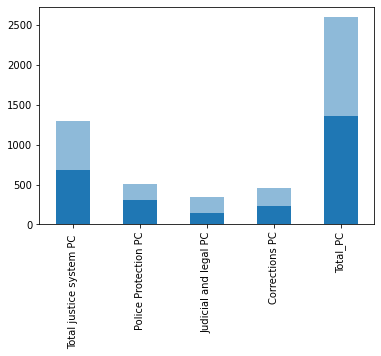

In [19]:
#Create a bar plot of the Mean over the Max Value
import matplotlib.pyplot as plt
import seaborn as sns
Just_pc.mean().plot(kind = "bar")
Just_pc.max().plot(kind="bar",alpha=0.5)

plt.show()

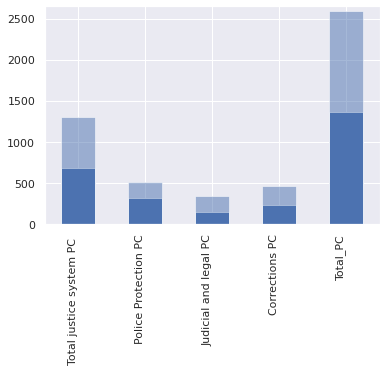

In [36]:
#Create a bar plot of the Mean over the Max Value
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig1 = Just_pc.mean().plot(kind='bar')
fig2 = Just_pc.max().plot(kind='bar',alpha=0.5)
plt.margins(0.02)
fig1.set_xticklabels(Just_pc.columns, rotation = 90, ha="right")
plt.show()


Print the median of the p_capita dataframe and label them. We are not interested in The population mean so we will be ranging from 1 to 5 instead of 0 to 5.

In [25]:
#Print the median of each of the per capita columns and label them.
print('Total Justice- Median =',p_capita.median()[1])
print('Police Protection- Median =',p_capita.median()[2])
print('Judicial and legal- Median =',p_capita.median()[3])
print('Corrections- Median =',p_capita.median()[4])
print('Total_PC- Median =',p_capita.median()[5])

Total Justice- Median = 662.085
Police Protection- Median = 292.055
Judicial and legal- Median = 130.77
Corrections- Median = 207.065
Total_PC- Median = 1324.17


Show the median of the columns over the maximum values of the columns to get a good overview of the data.

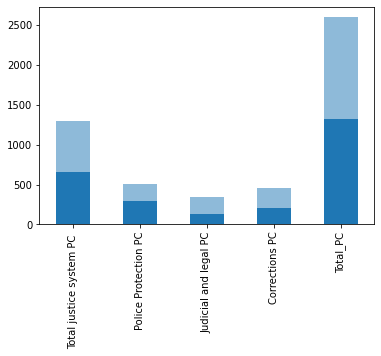

In [20]:
#Create a bar plot of the median over the max value

Just_pc.median().plot(kind = "bar")
Just_pc.max().plot(kind="bar",alpha=0.5)

plt.show()

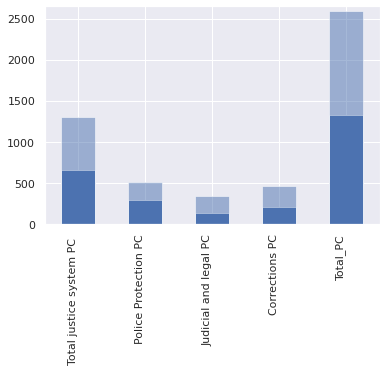

In [26]:
#Creat tyhe same plot using Seaborn
sns.set()

fig1 = Just_pc.median().plot(kind='bar')
fig2 = Just_pc.max().plot(kind='bar',alpha=0.5)
plt.margins(0.02)
fig1.set_xticklabels(Just_pc.columns, rotation = 90, ha="right")
plt.show()

Print the standard deviation of the p_capita dataframe and label them. 

In [27]:
#Print the Standard Deviation of each of the per capita columns and label them.
print('Total Justice- Standard Deviation =',p_capita['Total justice system PC '].std())
print('Police Protection- Standard Deviation =',p_capita['Police Protection PC'].std())
print('Judicial and legal- Standard Deviation =',p_capita['Judicial and legal PC'].std())
print('Corrections- Standard Deviation =',p_capita['Corrections PC'].std())
print('Total_PC- Standard Deviation =',p_capita['Total_PC'].std())

Total Justice- Standard Deviation = 172.03756839405392
Police Protection- Standard Deviation = 76.65696025110034
Judicial and legal- Standard Deviation = 51.39308228522113
Corrections- Standard Deviation = 69.31871189760278
Total_PC- Standard Deviation = 344.0756158414802


Print the range of the Just_PC(p_capita without population) dataframe and label them. We are not interested in The population mean so we Just_PC instead of p_capita. Then Show it.

Find the range of each column by subtracting the minimum value from the Maximum value.

In [22]:
# Create 'range' that has the range of the columns by subtracting the minimum value from the maximum value
range=Just_pc.max()-Just_pc.min()

In [23]:
#show Range
range

Total justice system PC      847.57
Police Protection PC         344.84
Judicial and legal PC        270.20
Corrections PC               313.98
Total_PC                    1695.15
dtype: float64

Show the Standard Deviation of the columns over the range of the columns to get a good overview of the data.

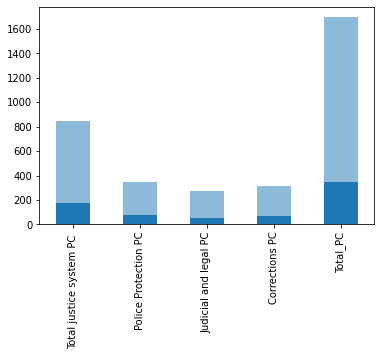

In [24]:
#Create a bar plot of the Standard deviation over the range
Just_pc.std().plot(kind = "bar")
range.plot(kind="bar",alpha=0.5)


plt.show()

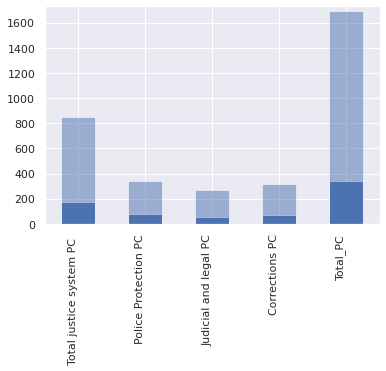

In [29]:
#Creat tyhe same plot using Seaborn
sns.set()

fig1 = Just_pc.std().plot(kind='bar')
fig2 = range.plot(kind='bar',alpha=0.5)
plt.margins(0.02)
fig1.set_xticklabels(Just_pc.columns, rotation = 90, ha="right")
plt.show()

**Part 4: Inference**

**Perform whatever analysis is necessary to answer your research question. Your analysis should include at least one graphic, and for each graphic you create you must do so using both Matplotlib and Seaborn (as described in Part 3 above). Include a narrative explaining your research approach and findings and be sure include any Python code used as part of your work**

Inference for Q1.

Create a new dataframe without Population, state, or Total_PC then show it. 

In [30]:
#Create a new dataframe that drops poulation, state, and total_pc
pc_minus_T=p_capita.drop(['Population 2016','State','Total_PC'],axis=1)

In [31]:
#show new data frame
pc_minus_T

,Total justice system PC,Police Protection PC,Judicial and legal PC,Corrections PC
1,480.11,257.21,74.43,148.47
2,1297.65,499.27,342.55,455.84
3,709.77,325.62,141.59,242.56
4,503.99,231.09,73.68,199.21
5,1063.89,448.11,221.27,394.51
6,711.18,338.09,136.11,236.98
7,767.90,345.66,231.06,191.18
8,910.60,366.65,219.12,324.84
10,701.08,380.44,114.70,205.94
11,568.02,263.81,117.93,186.28


Create the Interquartile range and show It.

In [32]:
#Create the interquartile range
Q1 = Just_pc.quantile(0.25)
Q3 = Just_pc.quantile(0.75)
IQR = Q3 - Q1

In [33]:
#View the IQR
IQR

Total justice system PC     182.3250
Police Protection PC         88.5850
Judicial and legal PC        49.7725
Corrections PC               74.9075
Total_PC                    364.6425
dtype: float64

Print the IQR for each of the Columns in the dataframe and label them.

In [34]:
#Print IQR by column
print('Total justice system PC- IQR =',IQR[0])
print('Police Protection PC- IQR =',IQR[1])
print('Judicial and legal PC- IQR =',IQR[2])
print('Corrections PC- IQR =',IQR[3])
print('Total_PC- IQR =',IQR[4])

Total justice system PC- IQR = 182.32500000000005
Police Protection PC- IQR = 88.5850000000001
Judicial and legal PC- IQR = 49.772499999999994
Corrections PC- IQR = 74.9075
Total_PC- IQR = 364.6424999999999


Get the total number of outliers in each column of the data frame by using the standard formula Q1-1.5* IQR and Q2 + 1.5* IQR.

In [35]:
#Get the total number of outliers by column
((Just_pc < (Q1 - 1.5 * IQR)) | (Just_pc > (Q3 + 1.5 * IQR))).sum()

Total justice system PC     3
Police Protection PC        2
Judicial and legal PC       1
Corrections PC              3
Total_PC                    3
dtype: int64

Show The data above as represented in seaborn and Matplotlib Box Plots for each of the five Per Capita Columns.

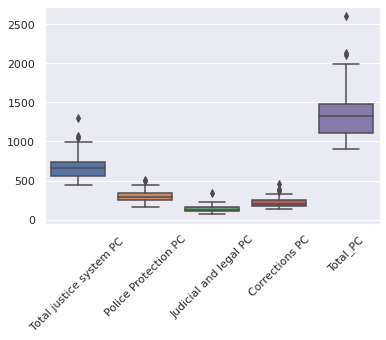

In [36]:
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#import seaborn under its alias sns
import seaborn as sns
#Generate a box plot of the per capita coulmns
sns.boxplot(data=Just_pc)
#rotate x Labaels
plt.xticks(rotation=45)
# show plot 
plt.show() 



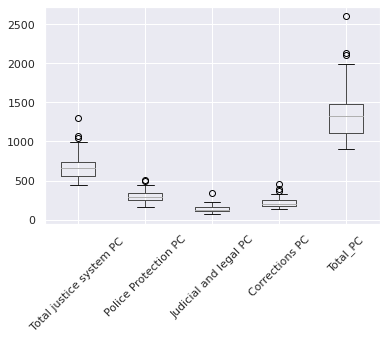

In [37]:
#Generate a box plot of the per capita coulmns
Just_pc.boxplot()
#rotate x Labaels
plt.xticks(rotation=45)
# show plot 
plt.show() 

Show The data above as represented in seaborn and Matplotlib Box Plots for the same columns minus Total_PC.

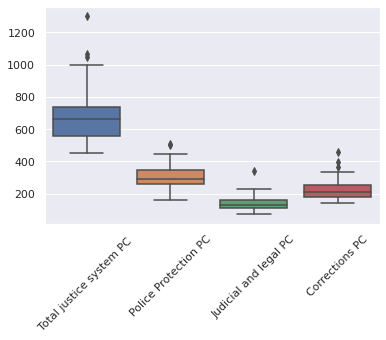

In [38]:
#Generate a box plot of the per capita coulmns
sns.boxplot(data=pc_minus_T)
#rotate x Labaels
plt.xticks(rotation=45)
# show plot 
plt.show() 

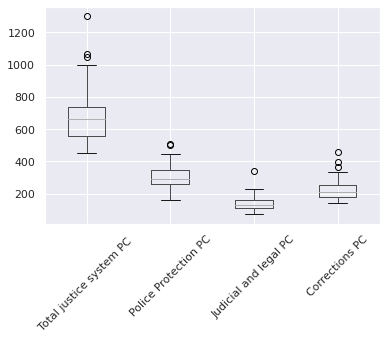

In [39]:
#Generate a box plot of the per capita coulmns
pc_minus_T.boxplot()
#rotate x Labaels
plt.xticks(rotation=45)
# show plot 
plt.show() 

Inference for Q2.

Show all the columns in the p_capita dataframe to make sure we know what we are working with.

In [40]:
#Show the columns in p_capita
p_capita.columns

Index(['State', 'Population 2016', 'Total justice system PC ',
       'Police Protection PC', 'Judicial and legal PC', 'Corrections PC',
       'Total_PC'],
      dtype='object')

Create five new data frames one for each of the five Per Capita columns. Each dataframe will only have it's corresponding column values and the state column.

In [41]:
#Create five data frames for each of the per capita columns along with the state column
justice_pc=p_capita.drop(['Population 2016', 'Police Protection PC', 'Judicial and legal PC', 'Corrections PC','Total_PC'],axis=1)
Police_pc=p_capita.drop(['Population 2016', 'Total justice system PC ','Judicial and legal PC', 'Corrections PC','Total_PC'],axis=1)
judicial_pc=p_capita.drop(['Population 2016', 'Total justice system PC ','Police Protection PC', 'Corrections PC','Total_PC'],axis=1)
corretion_pc=p_capita.drop(['Population 2016', 'Total justice system PC ','Police Protection PC', 'Judicial and legal PC','Total_PC'],axis=1)
T_total_pc=p_capita.drop(['Population 2016', 'Total justice system PC ','Police Protection PC', 'Judicial and legal PC', 'Corrections PC'],axis=1)

Order The column in descending order so that we can show it in descending order then show it and print graphs in descending order in both matplotlib and seaborn.

In [49]:
#Order your new dataframe in descending order
justice_pc=justice_pc.sort_values(by=['Total justice system PC '], ascending=False)


In [50]:
#Show it in descending order
justice_pc

,State,Total justice system PC
2,Alaska,1297.65
5,California,1063.89
33,New York,1048.95
51,Wyoming,997.13
21,Maryland,912.84
8,Delaware,910.60
32,New Mexico,824.87
29,Nevada,812.32
38,Oregon,808.33
31,New Jersey,791.11


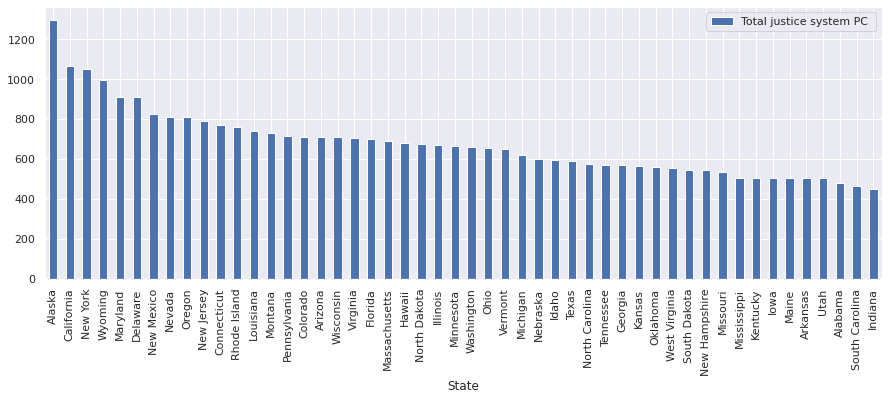

In [51]:
#Create the barplot in descending order
justice_pc.plot.bar(x='State',y='Total justice system PC ', figsize=(15,5))

plt.show()

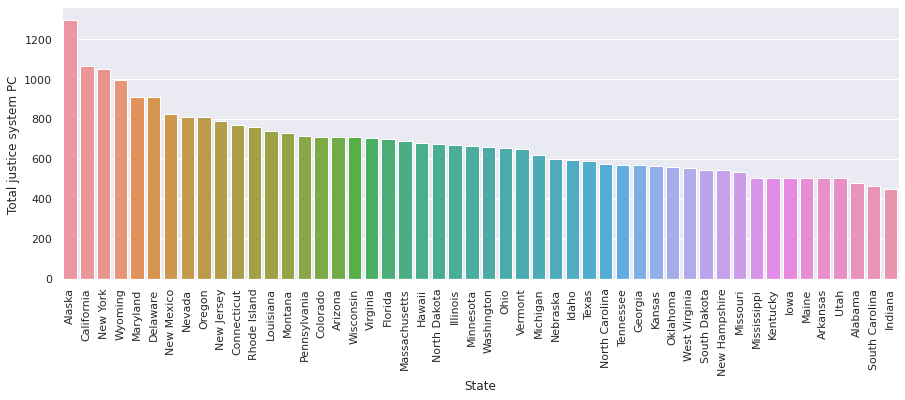

In [52]:
#Create the barplot in descending order
sns.barplot(x='State',y='Total justice system PC ',data=justice_pc)
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(rotation=90)
plt.show()

Order The column in descending order so that we can show it in descending order then show it and print graphs in descending order in both matplotlib and seaborn.

In [53]:
#Order your new dataframe in descending order
Police_pc=Police_pc.sort_values(by=['Police Protection PC'], ascending=False)

In [54]:
#Show it in descending order
Police_pc

,State,Police Protection PC
33,New York,505.16
2,Alaska,499.27
5,California,448.11
21,Maryland,441.17
51,Wyoming,413.82
40,Rhode Island,412.11
14,Illinois,406.65
29,Nevada,405.63
31,New Jersey,388.21
10,Florida,380.44


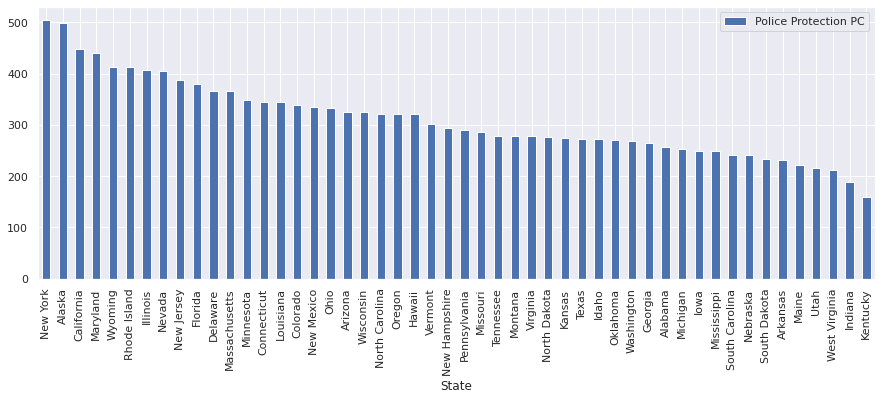

In [55]:
#Create the barplot in descending order
Police_pc.plot.bar(x='State',y='Police Protection PC', figsize=(15,5))

plt.show()

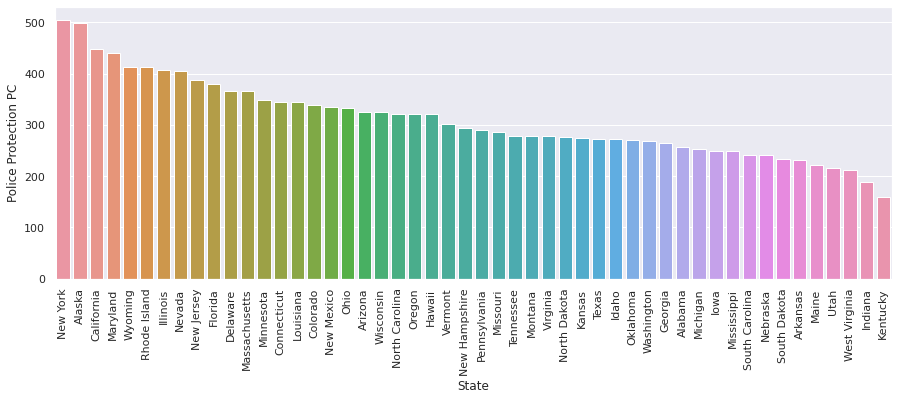

In [56]:
#Create the barplot in descending order
sns.barplot(x='State',y='Police Protection PC',data=Police_pc)
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(rotation=90)
plt.show()

Order The column in descending order so that we can show it in descending order then show it and print graphs in descending order in both matplotlib and seaborn.

In [57]:
#Order your new dataframe in descending order
judicial_pc=judicial_pc.sort_values(by=['Judicial and legal PC'], ascending=False)

In [58]:
#Show it in descending order
judicial_pc

,State,Judicial and legal PC
2,Alaska,342.55
7,Connecticut,231.06
5,California,221.27
8,Delaware,219.12
51,Wyoming,216.09
33,New York,211.65
12,Hawaii,206.21
27,Montana,203.06
38,Oregon,189.50
31,New Jersey,172.68


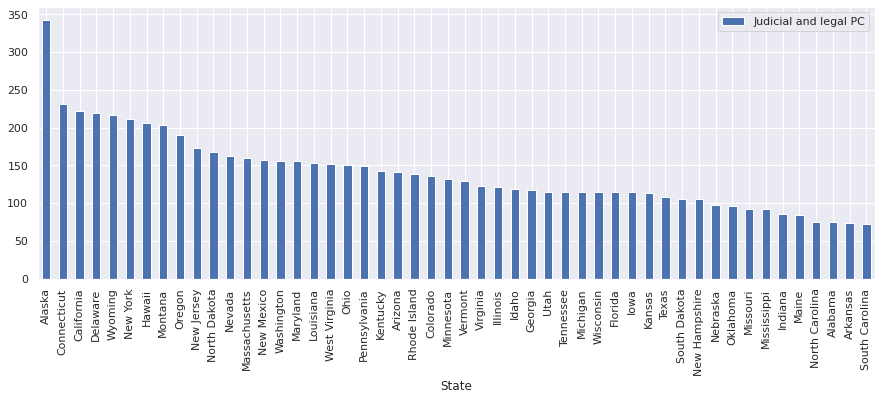

In [59]:
#Create the barplot in descending order
judicial_pc.plot.bar(x='State',y='Judicial and legal PC', figsize=(15,5))

plt.show()

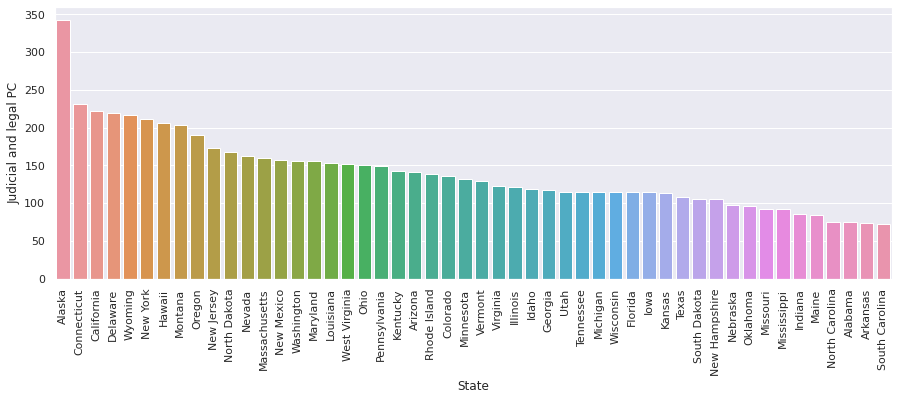

In [60]:
#Create the barplot in descending order
sns.barplot(x='State',y='Judicial and legal PC',data=judicial_pc)
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(rotation=90)
plt.show()

Order The column in descending order so that we can show it in descending order then show it and print graphs in descending order in both matplotlib and seaborn.

In [61]:
#Order your new dataframe in descending order
corretion_pc=corretion_pc.sort_values(by=['Corrections PC'], ascending=False)


In [62]:
#Show it in descending order
corretion_pc

,State,Corrections PC
2,Alaska,455.84
5,California,394.51
51,Wyoming,367.22
32,New Mexico,332.68
33,New York,332.14
8,Delaware,324.84
21,Maryland,316.30
47,Virginia,304.45
38,Oregon,297.27
39,Pennsylvania,274.49


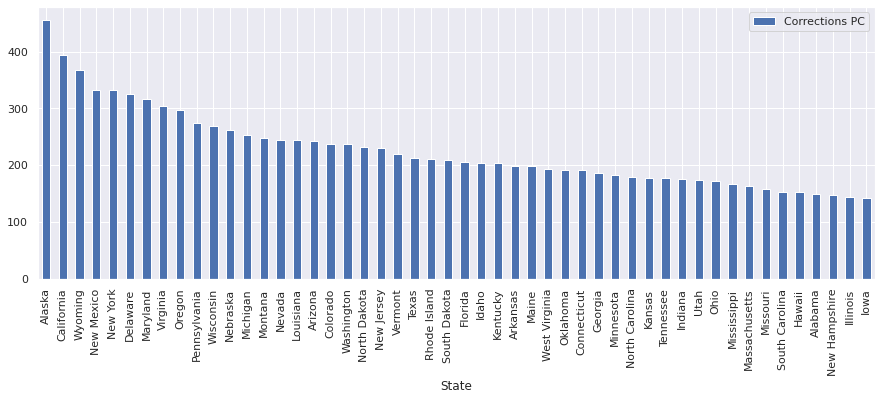

In [63]:
#Create the barplot in descending order
corretion_pc.plot.bar(x='State',y='Corrections PC', figsize=(15,5))

plt.show()

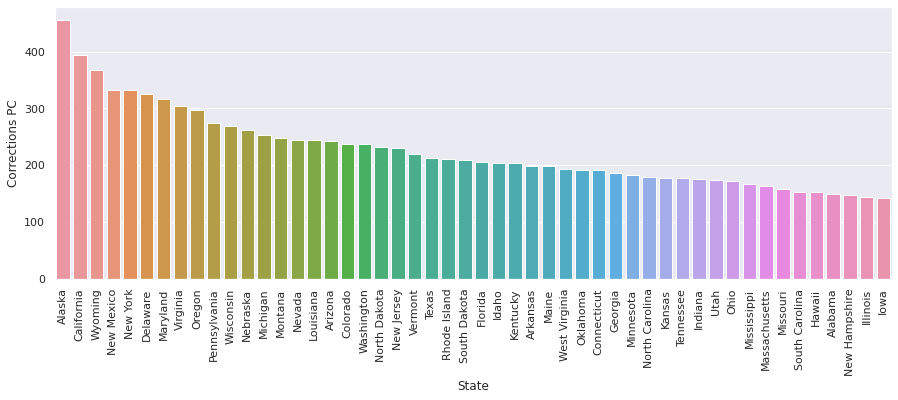

In [64]:
#Create the barplot in descending order
sns.barplot(x='State',y='Corrections PC',data=corretion_pc)
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(rotation=90)
plt.show()

Order The column in descending order so that we can show it in descending order then show it and print graphs in descending order in both matplotlib and seaborn.

In [65]:
#Order your new dataframe in descending order
T_total_pc=T_total_pc.sort_values(by=['Total_PC'], ascending=False)

In [66]:
#Show it in descending order
T_total_pc

,State,Total_PC
2,Alaska,2595.31
5,California,2127.78
33,New York,2097.90
51,Wyoming,1994.26
21,Maryland,1825.68
8,Delaware,1821.21
32,New Mexico,1649.74
29,Nevada,1624.64
38,Oregon,1616.65
31,New Jersey,1582.22


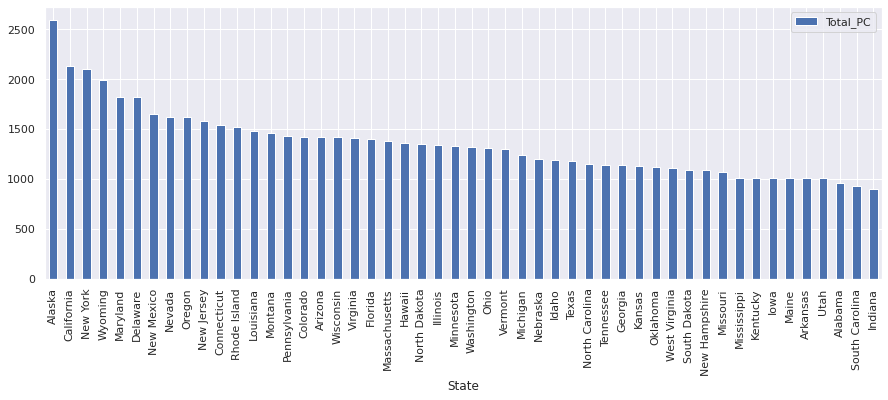

In [67]:
#Create the barplot in descending order
T_total_pc.plot.bar(x='State',y='Total_PC', figsize=(15,5))

plt.show()

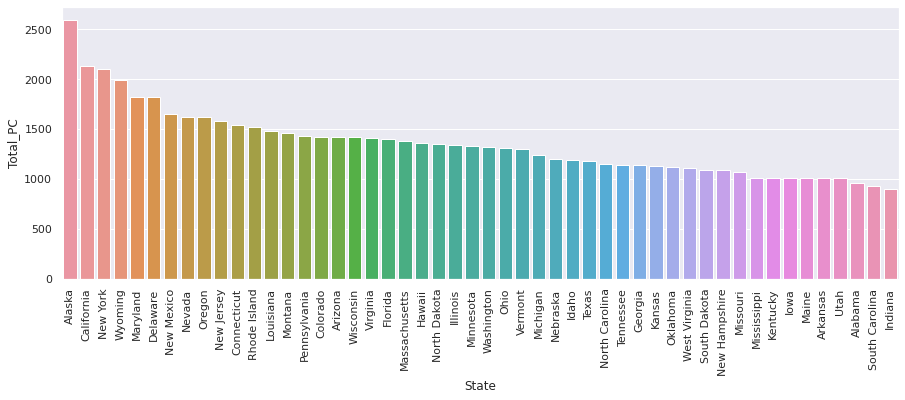

In [68]:
#Create the barplot in descending order
sns.barplot(x='State',y='Total_PC',data=T_total_pc)
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(rotation=90)
plt.show()

**Part 5: Conclusions**


Q1: Did any of the states pay so much or so little that they may be considered outliers in comparison to other states?

Steps Taken: Generate the interquartile range of the Per Capita columns and create a box plot showing the outliers.

Conclusion: The end result of our analysis shows that all of the columns have outliers. Total justice system PC has 3, Police Protection has 2, Judicial and Legal has 1, Corrections has 3, and Total_PC has 3 as well. Considering the size of the data set we were working with of just fifty rows three outliers represent that 6 percent of our data is composed of outliers.

Q2: Can we determine which states paid the most to least in descending order?

Steps Taken: Create five new data frames of each of the Per capita columns by state. Then make a bar plot of these new data frames in descending order.

Conclusion: We see from our analysis and our plots that we have successfully determined which states pay the most and least Per capita in descending order. 
For the Total_PC Column, Alaska is high and Indiana is low.
For the Corrections PC column, Alaska is high and Iowa is low.
For the Judicial and Legal column, Alaska is high and South Carolina is low.
For the Police Protection PC column New York is high and Kentucky is low.
For the Justice system PC column Alaska is high and Indiana is low.



**Refrences**

Kaggle.com - https://www.kaggle.com/rishidamarla/judicial-expenditures-across-all-50-states

Data world - https://data.world/usbjs/justice-expenditure-and-employment-2016/workspace/file?filename=jeee16t08.csv